In [21]:
from hossam import load_data, my_dpi
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
origin=load_data('wholesale_customers')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

이 데이터 세트는 도매 유통업체의 고객 정보를 담고 있습니다. 다양한 제품 카테고리에 대한 연간 지출액(mu, 화폐 단위)을 포함합니다. (출처: https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

컬럼명            의미                  설명
----------------  --------------------  --------------------------------------------------------------------------------------------
Channel           유통 채널             고객의 거래 채널을 나타냄. 주로 Horeca(호텔·레스토랑·카페) 또는 Retail(소매점) 구분에 사용됨
Region            지역                  고객이 속한 지리적 지역 구분 변수. 특정 국가 내의 권역 정보
Fresh             신선식품 구매액       육류, 채소, 과일 등 신선식품 카테고리에 대한 연간 구매 금액
Milk              유제품 구매액         우유, 치즈, 요거트 등 유제품 카테고리에 대한 연간 구매 금액
Grocery           식료품 구매액         가공식품, 일반 식료품 등 장기 보관 식품 카테고리 구매 금액
Frozen            냉동식품 구매액       냉동 육류, 냉동 가공식품 등 냉동식품 카테고리 구매 금액
Detergents_Paper  세제·종이류 구매액    세제, 화장지, 키친타월 등 생활 소모품 구매 금액
Delicassen        즉석·가공식품 구매액  즉석식품, 델리 식품, 가공 반찬류 등의 구매 금액


===== 데이터 크기 확인 =====
데이터셋 크기 : (440, 8)
행 개수 : 440개
열 개수 : 8개

===== 타입 확인 =====
<class 'pandas.core.frame.D

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


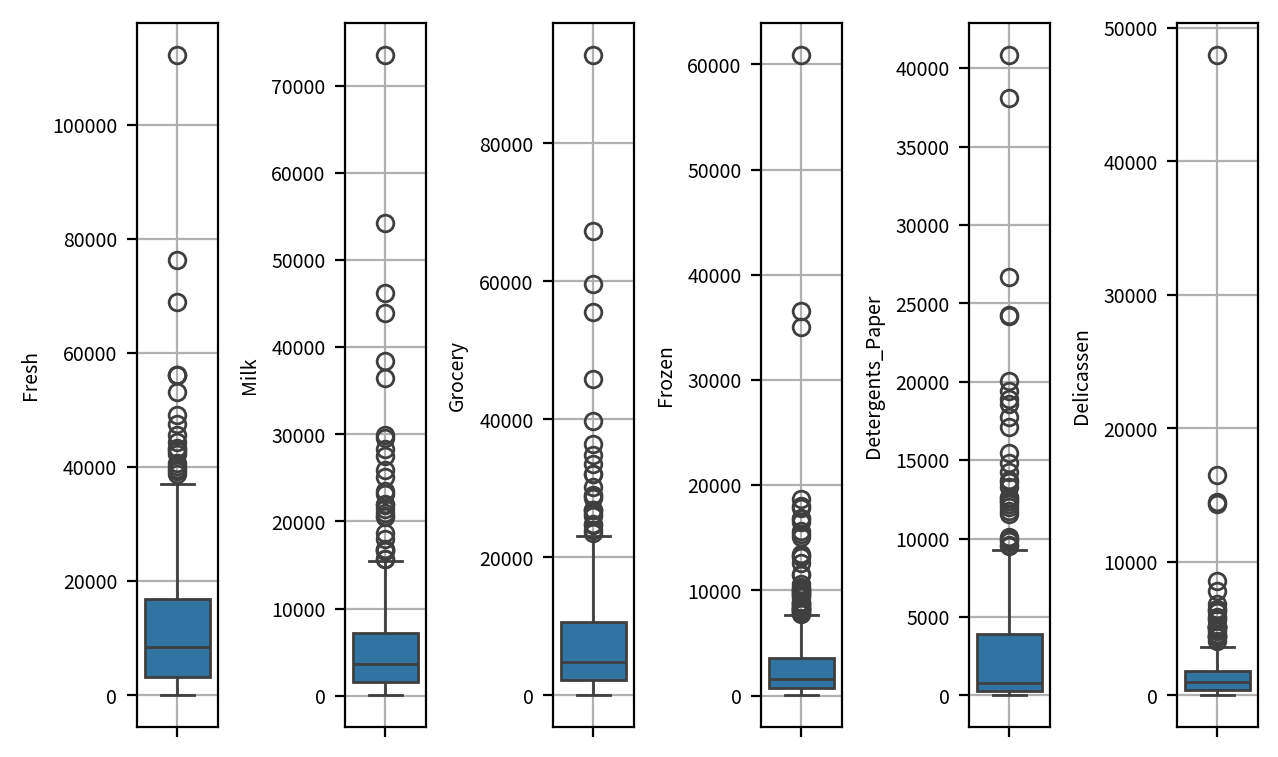

In [10]:
my_list=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=len(my_list)
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for i, v in enumerate(my_list):
    # 2. 그래프 그리기
    sb.boxplot(data=origin[v], orient='v', ax=ax[i])

    # 3. 그래프 꾸미기
    ax[i].grid(True)

# 4. 출력
plt.tight_layout()
plt.show()
plt.close()

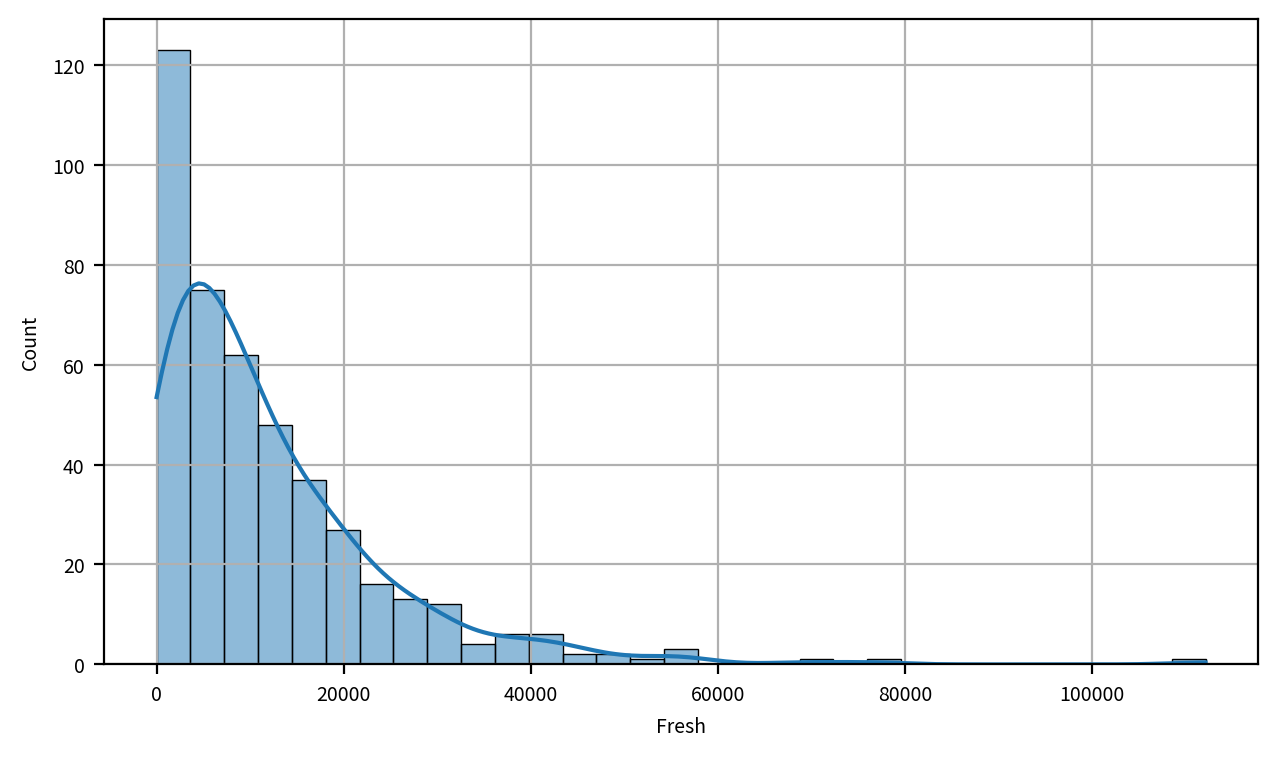

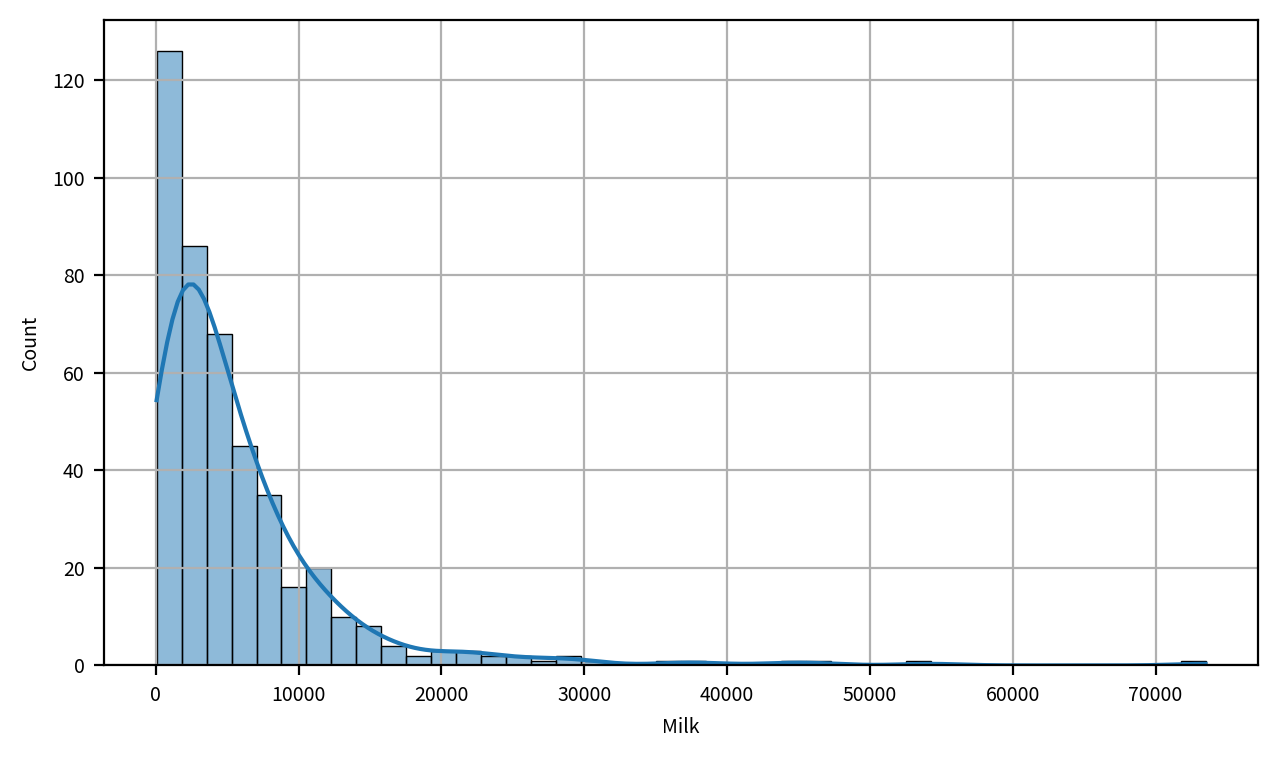

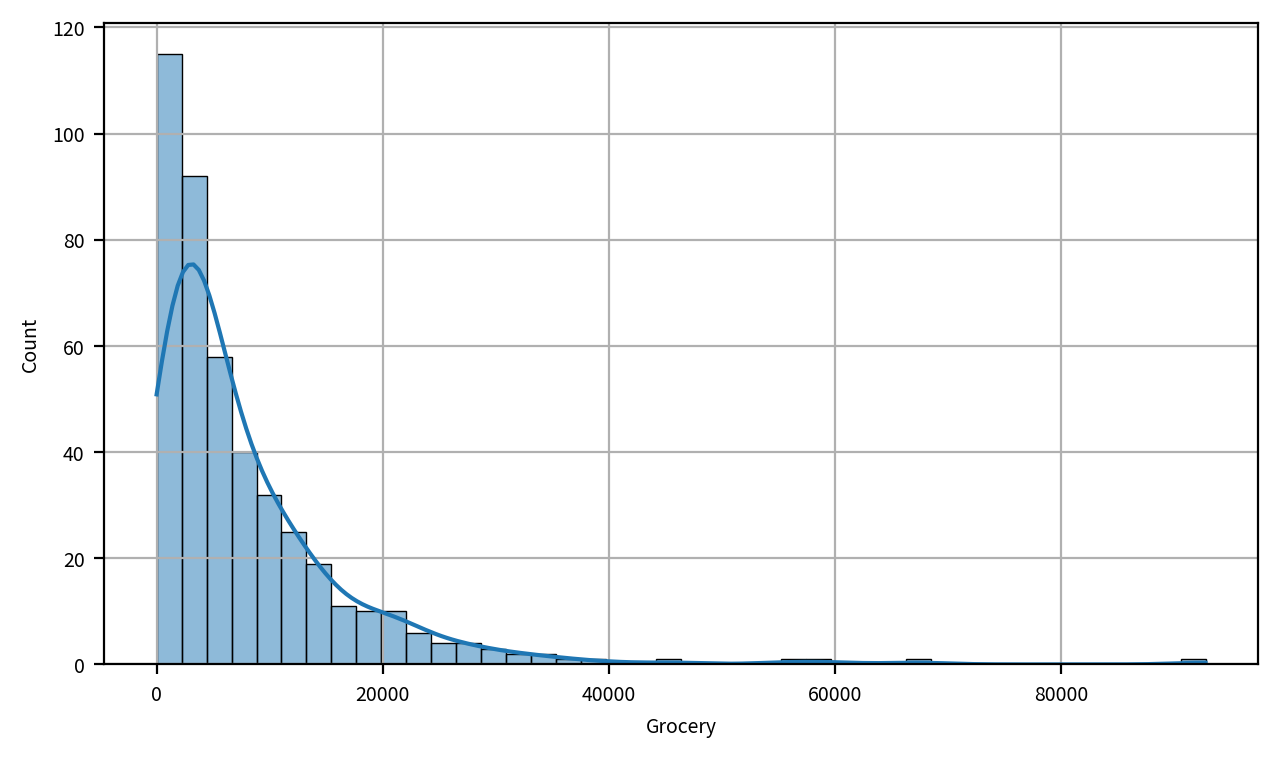

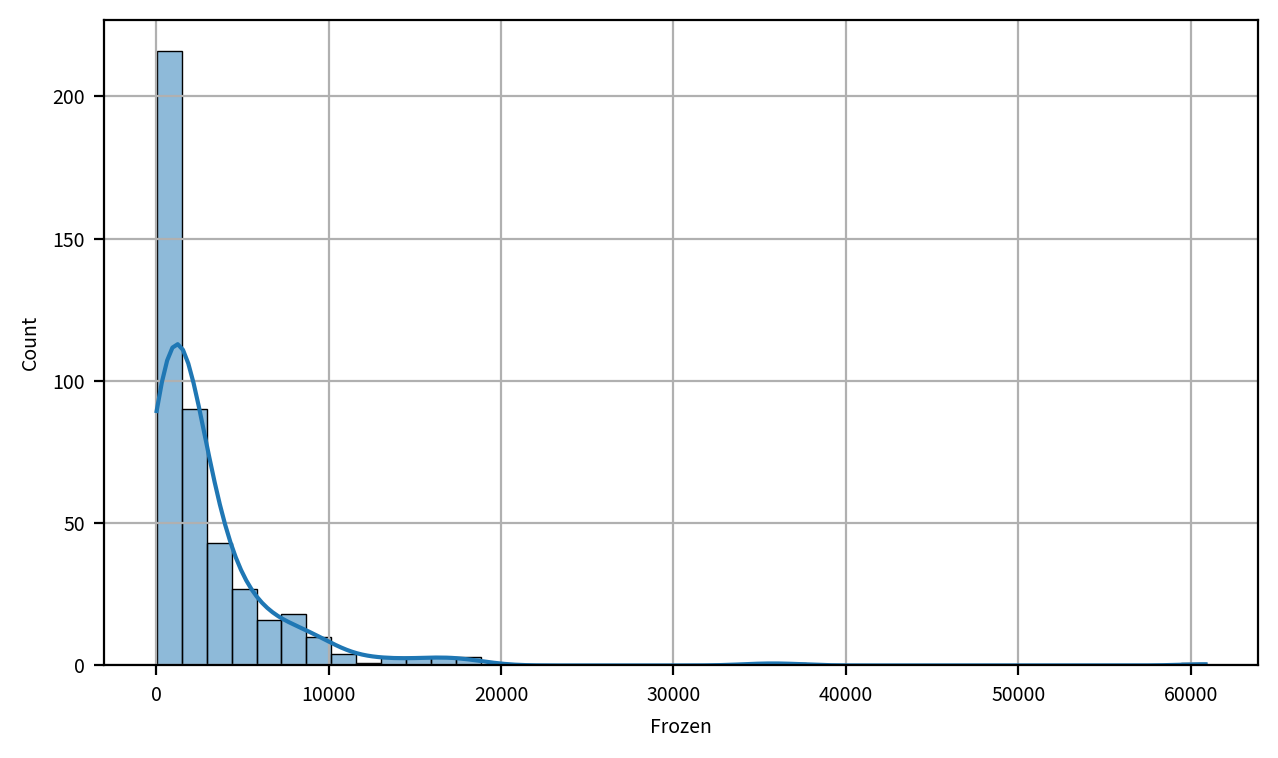

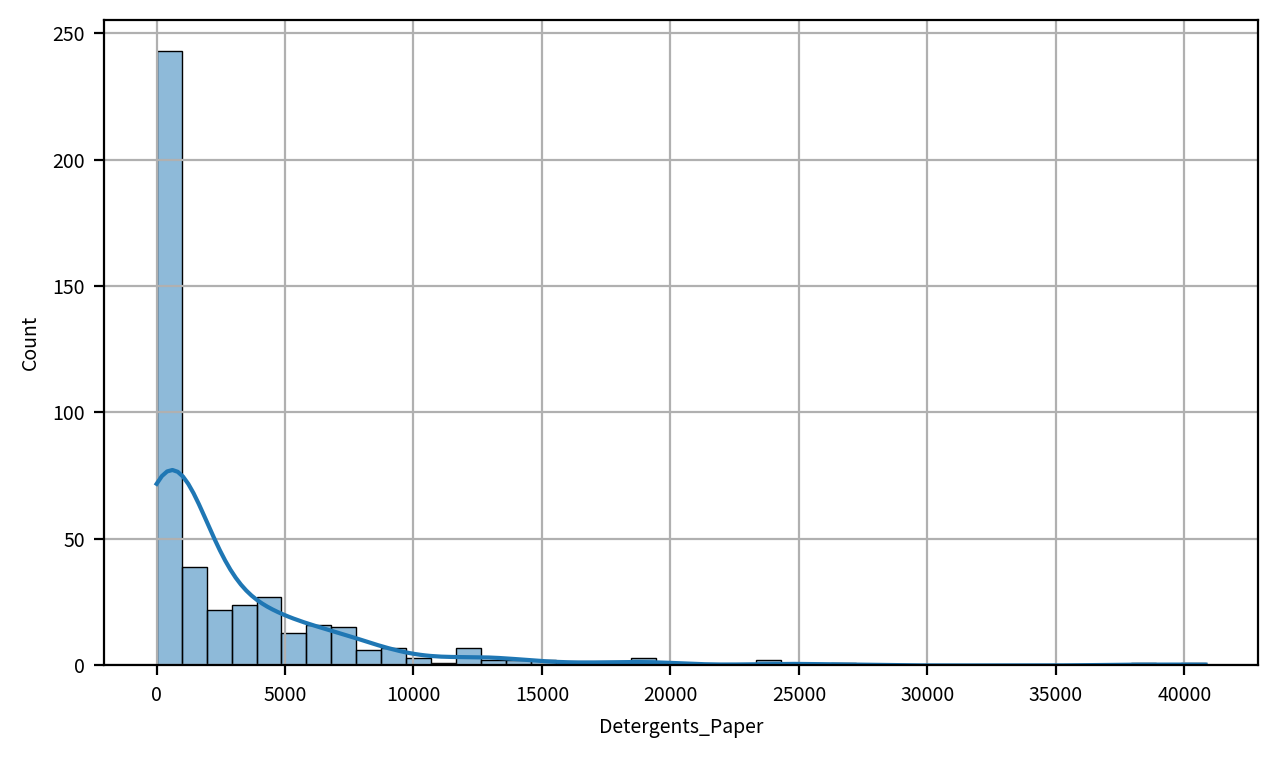

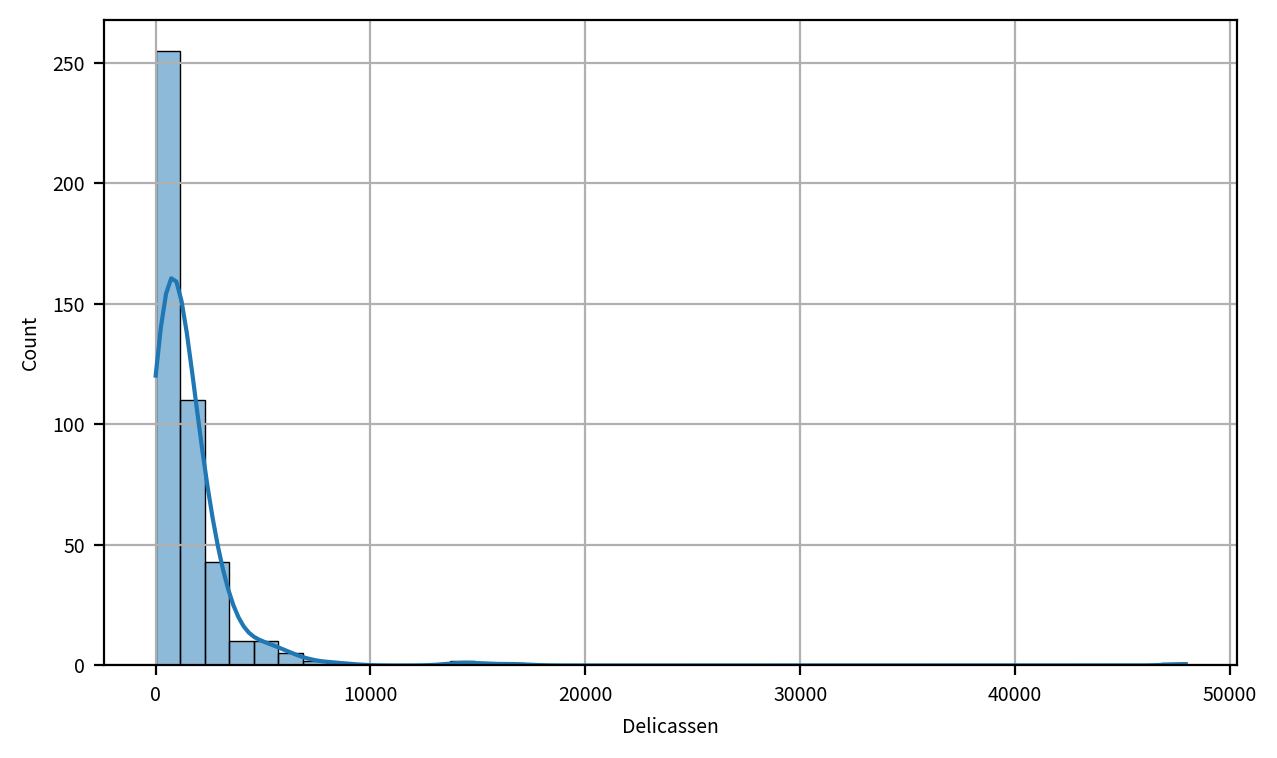

In [14]:
my_list=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for i in my_list:
    # 1. 그래프 초기화
    width_px=1280
    height_px=760
    rows=1
    cols=1
    figsize=(width_px/my_dpi, height_px/my_dpi)
    fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
    # 2. 그래프 그리기
    sb.histplot(data=origin, x=i, edgecolor='#000000', linewidth=0.5, kde=True)

    # 3. 그래프 꾸미기
    ax.grid(True)

    # 4. 출력
    plt.tight_layout()
    plt.show()
    plt.close()

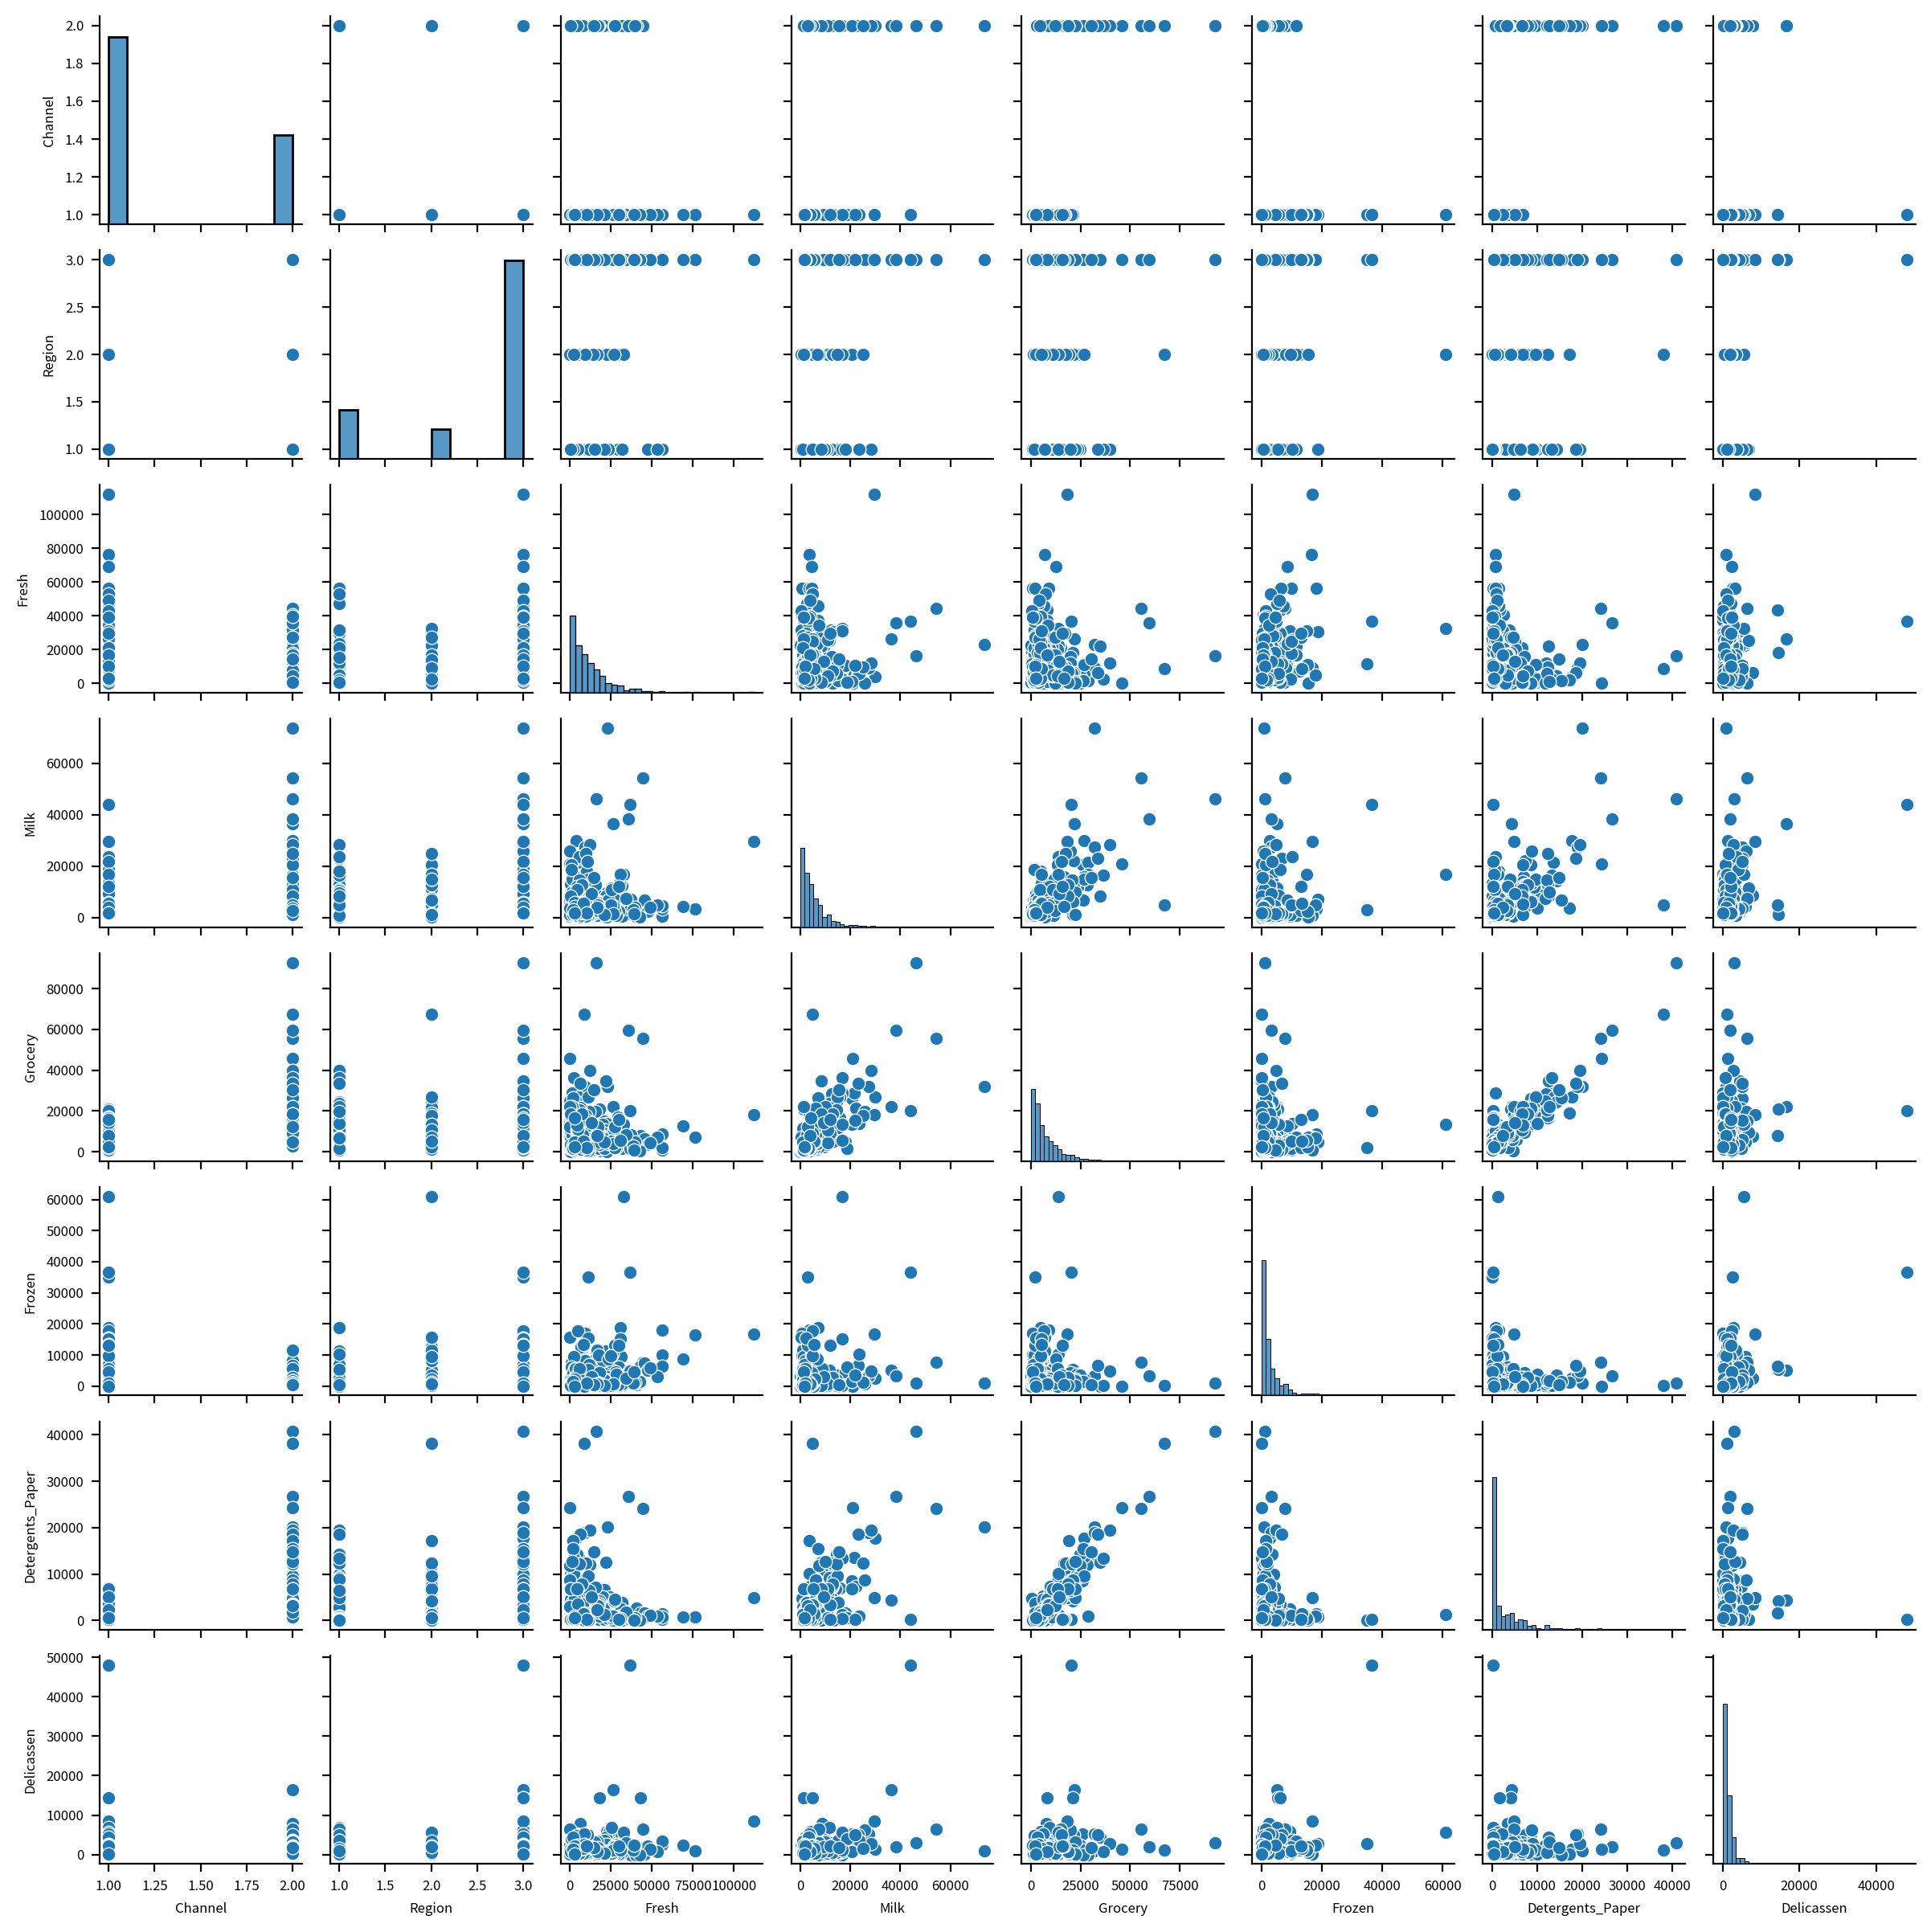

✅ 이상치 요약


,original_skew,log_skew,outliers(|z|>3)
Channel,0.760951,0.760951,0.0
Region,-1.283627,-1.385733,0.0
Fresh,2.561323,-1.707427,7.0
Milk,4.053755,-0.777474,9.0
Grocery,3.587429,-0.837360,7.0
Frozen,5.907986,-0.743309,6.0
Detergents_Paper,3.631851,-0.321751,10.0
Delicassen,11.151586,-1.298797,4.0


🎈 상관 분석


,var_a,var_b,linearity,outlier_flag,chosen,corr,pval,significant,strength
0,Channel,Region,False,False,spearman,0.047156,3.237018e-01,False,Very Weak
1,Channel,Fresh,False,True,spearman,-0.178541,1.667153e-04,True,Very Weak
2,Channel,Milk,False,True,spearman,0.613719,6.878837e-47,True,Strong
3,Channel,Grocery,False,True,spearman,0.708922,2.059225e-68,True,Strong
4,Channel,Frozen,False,True,spearman,-0.236294,5.341313e-07,True,Weak
5,Channel,Detergents_Paper,False,True,spearman,0.745970,2.417633e-79,True,Strong
6,Channel,Delicassen,False,True,spearman,0.164936,5.133403e-04,True,Very Weak
7,Region,Fresh,True,True,spearman,0.046885,3.264847e-01,False,Very Weak
8,Region,Milk,True,True,spearman,0.040751,3.938082e-01,False,Very Weak
9,Region,Grocery,True,True,spearman,0.003535,9.410624e-01,False,Very Weak


📊 상관 행렬


,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
Channel,1.000000,0.164936,0.745970,-0.178541,-0.236294,0.708922,0.613719,0.047156
Delicassen,0.164936,1.000000,0.183314,0.238400,0.233024,0.304256,0.372771,0.009313
Detergents_Paper,0.745970,0.183314,1.000000,-0.198333,-0.207183,0.801282,0.679979,0.010728
Fresh,-0.178541,0.238400,-0.198333,1.000000,0.384395,-0.119983,-0.083921,0.046885
Frozen,-0.236294,0.233024,-0.207183,0.384395,1.000000,-0.168831,-0.092971,-0.076756
Grocery,0.708922,0.304256,0.801282,-0.119983,-0.168831,1.000000,0.773049,0.003535
Milk,0.613719,0.372771,0.679979,-0.083921,-0.092971,0.773049,1.000000,0.040751
Region,0.047156,0.009313,0.010728,0.046885,-0.076756,0.003535,0.040751,1.000000


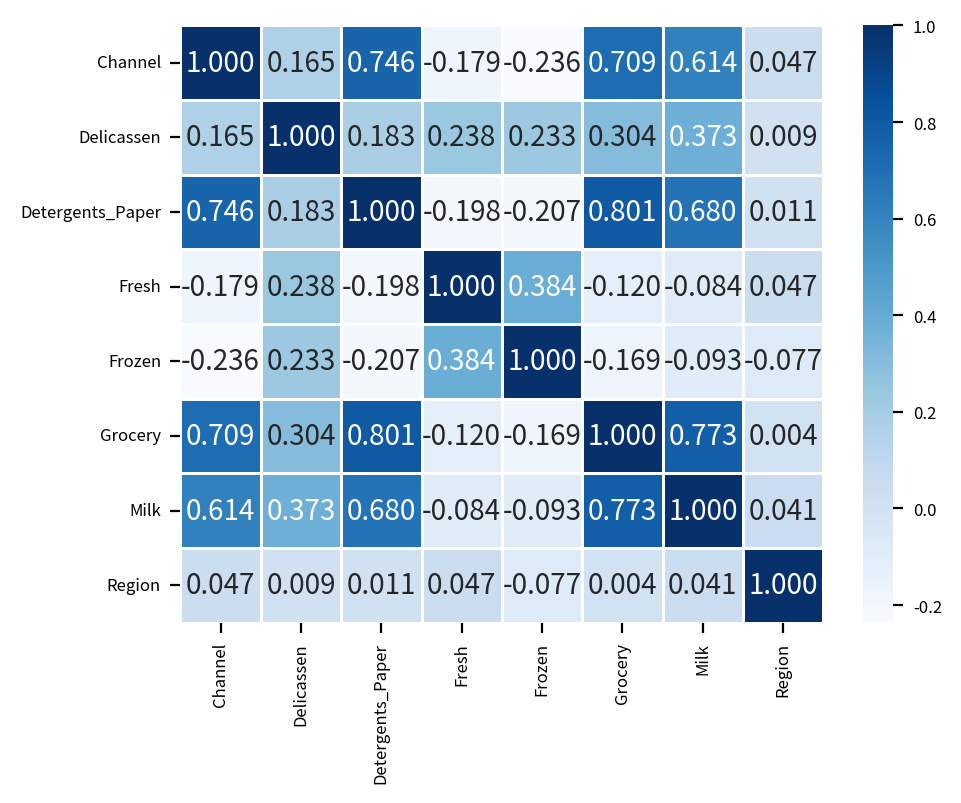

In [16]:
# 데이터 입력
df=origin.copy()

# 패키지 참조
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, pearsonr, spearmanr
from itertools import combinations

# 그래프 초기화
my_dpi=200
font_path='./NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

# 페어플롯으로 형태 확인
width_px=2400
height_px=2400
figsize=(width_px/my_dpi, height_px/my_dpi)

g=sb.pairplot(df, diag_kind='hist')
g.fig.set_size_inches(figsize)
g.fig.set_dpi(my_dpi)
plt.tight_layout()
plt.show()
plt.close()

# 이상치 요약
print('='*50)
print('✅ 이상치 요약')
print('='*50)
skew_outlier={}
for col in df.columns:
    temp=df[col].dropna()
    skew_original=temp.skew()
    z_scores=zscore(temp)
    outlier_count=int(np.sum(np.abs(z_scores)>3))

    data_log=np.log1p(temp-temp.min()+1)
    skew_log=data_log.skew()
    skew_outlier[col]={
        'original_skew':skew_original,
        'log_skew':skew_log,
        'outliers(|z|>3)':outlier_count
    }
skew_outlier_df=DataFrame(skew_outlier).T
display(skew_outlier_df)

# 상관 분석
print('='*50)
print('🎈 상관 분석')
print('='*50)
rows=[]
for a, b in combinations(df.columns, 2):
    x=df[a]
    y=df[b]
    X=sm.add_constant(x)
    model=sm.OLS(y,X).fit()
    reset=linear_reset(model, power=2, use_f=True)
    linearity_ok=reset.pvalue>0.05
    a_flag=skew_outlier_df.loc[a, 'outliers(|z|>3)']>0
    b_flag=skew_outlier_df.loc[b, 'outliers(|z|>3)']>0
    outlier_flag=a_flag or b_flag
    if linearity_ok and not outlier_flag:
        chosen='pearson'
        corr, pval=pearsonr(x, y)
    else:
        chosen='spearman'
        corr, pval=spearmanr(x, y)
    significant=pval<=0.05
    abs_r=abs(corr)
    if abs_r>=0.80:
        strength='Very Strong'
    elif abs_r>=0.60:
        strength='Strong'
    elif abs_r>=0.40:
        strength='Medium'
    elif abs_r>=0.20:
        strength='Weak'
    else:
        strength='Very Weak'
    rows.append({
        'var_a':a,
        'var_b':b,
        'linearity':linearity_ok,
        'outlier_flag':outlier_flag,
        'chosen':chosen,
        'corr':corr,
        'pval':pval,
        'significant':significant,
        'strength':strength
    })
summary_df=DataFrame(rows)
display(summary_df)

# 상관 행렬
print('='*50)
print('📊 상관 행렬')
print('='*50)
vars=sorted(set(summary_df['var_a']).union(summary_df['var_b']))
corr_matrix=DataFrame(np.nan, index=vars, columns=vars)
for _, row in summary_df.iterrows():
    a, b, r = row['var_a'], row['var_b'], row['corr']
    corr_matrix.loc[a,b]=r
    corr_matrix.loc[b,a]=r
np.fill_diagonal(corr_matrix.values,1)
display(corr_matrix)

# 상관행렬 시각화
width_px=1000
height_px=800
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.heatmap(data=corr_matrix, annot=True, fmt='0.3f', linewidth=0.5, cmap='Blues', annot_kws={'size':10})
plt.tight_layout()
plt.show()
plt.close()

In [19]:
df=origin[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

for i in df.columns:
    df[f'log_{i}']=np.log(df[i])

df.head()

C:\Users\itwill\AppData\Local\Temp\ipykernel_12276\880732275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'log_{i}']=np.log(df[i])


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,log_Fresh,log_Milk,log_Grocery,log_Frozen,log_Detergents_Paper,log_Delicassen
0,12669,9656,7561,214,2674,1338,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,7057,9810,9568,1762,3293,1776,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,6353,8808,7684,2405,3516,7844,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,13265,1196,4221,6404,507,1788,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,22615,5410,7198,3915,1777,5185,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [20]:
pre_df=df[['log_Fresh', 'log_Milk', 'log_Grocery', 'log_Frozen', 'log_Detergents_Paper', 'log_Delicassen']]

pre_df.head()

,log_Fresh,log_Milk,log_Grocery,log_Frozen,log_Detergents_Paper,log_Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [22]:
scaler=StandardScaler()
sdf=DataFrame(scaler.fit_transform(pre_df), columns=pre_df.columns)
sdf.head()

,log_Fresh,log_Milk,log_Grocery,log_Frozen,log_Detergents_Paper,log_Delicassen
0,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685
1,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967
2,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420
3,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110
4,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246


In [23]:
estimator=PCA(n_components='mle', random_state=52)
pca=estimator.fit_transform(sdf)
pca

array([[ 1.37937462, -0.30383791, -0.21638512, -1.41786264,  0.33588295],
       [ 1.43480713,  0.53814669,  0.08377373,  0.03305806,  0.11472244],
       [ 1.50395108,  1.22615334,  0.97824147, -0.14830833, -0.14407631],
       ...,
       [ 2.84439229,  0.19594314, -0.50310253, -0.88635579, -0.15111821],
       [-1.00960255,  0.44811099,  0.66519719, -0.81436695,  0.18534446],
       [-0.90233041, -2.910913  , -0.90350616, -1.07959232,  0.29584419]],
      shape=(440, 5))

In [24]:
n=pca.shape[1]
cols=[f'PC{i+1}' for i in range(n)]

pca_df=DataFrame(pca, columns=cols)
pca_df['target']=origin['Region']
pca_df

,PC1,PC2,PC3,PC4,PC5,target
0,1.379375,-0.303838,-0.216385,-1.417863,0.335883,3
1,1.434807,0.538147,0.083774,0.033058,0.114722,3
2,1.503951,1.226153,0.978241,-0.148308,-0.144076,3
3,-0.824133,1.205770,0.244840,0.344925,-0.717047,3
4,0.797388,1.756986,0.311525,-0.223667,-0.254503,3
...,...,...,...,...,...,...
435,0.590633,2.260681,-0.206312,0.667066,1.076039,3
436,-2.149349,1.687197,0.329179,-0.513060,0.130021,3
437,2.844392,0.195943,-0.503103,-0.886356,-0.151118,3
438,-1.009603,0.448111,0.665197,-0.814367,0.185344,3


In [26]:
estimator=PCA(n_components=0.8, random_state=52)
pca=estimator.fit_transform(sdf)

n=pca.shape[1]
cols=[f'PC{i+1}' for i in range(n)]

pca_df=DataFrame(pca, columns=cols)
pca_df['target']=origin['Region']
pca_df

,PC1,PC2,PC3,target
0,1.379375,-0.303838,-0.216385,3
1,1.434807,0.538147,0.083774,3
2,1.503951,1.226153,0.978241,3
3,-0.824133,1.205770,0.244840,3
4,0.797388,1.756986,0.311525,3
...,...,...,...,...
435,0.590633,2.260681,-0.206312,3
436,-2.149349,1.687197,0.329179,3
437,2.844392,0.195943,-0.503103,3
438,-1.009603,0.448111,0.665197,3


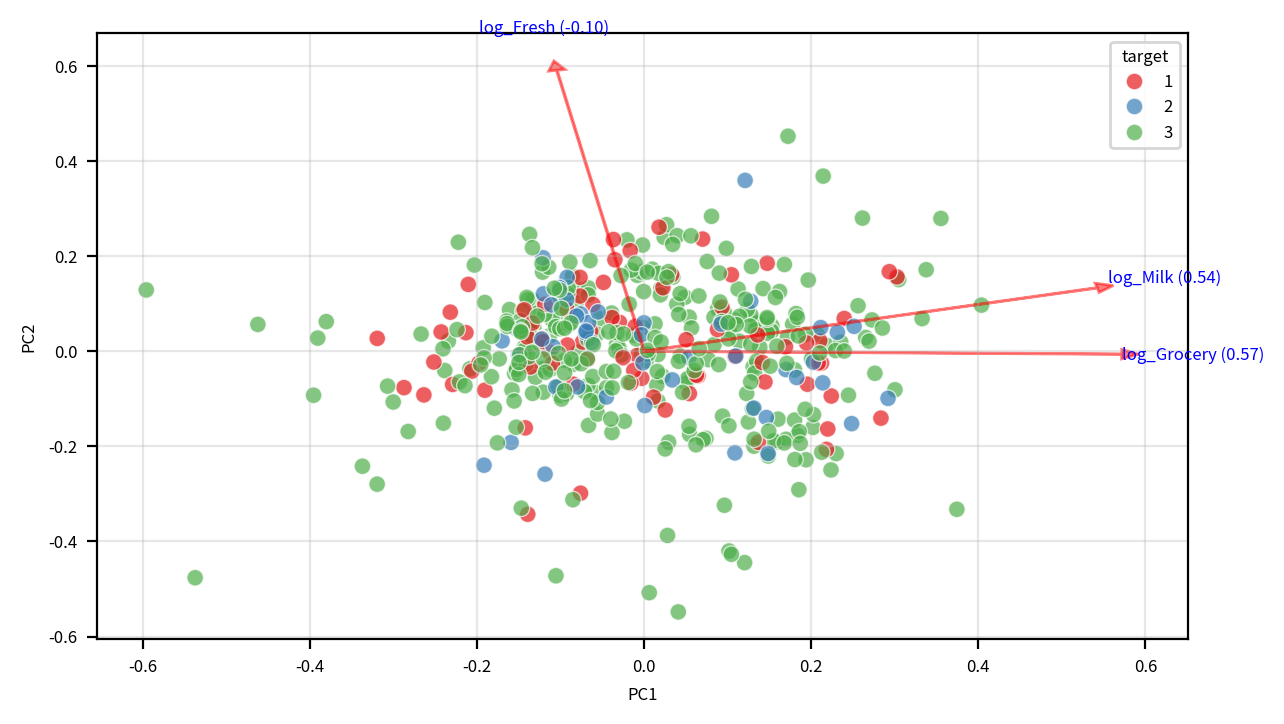

In [28]:
xname='PC1'
yname='PC2'

score=estimator.transform(sdf)
components=estimator.components_

x_index=pca_df.columns.get_loc(xname)
y_index=pca_df.columns.get_loc(yname)

xs=score[:, x_index]
ys=score[:, y_index]
n=score.shape[1]

scalex=1.0/(xs.max()-xs.min())
scaley=1.0/(ys.max()-ys.min())

figsize=(1280/my_dpi, 720/my_dpi)
fig, ax=plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)

sb.scatterplot(x=xs*scalex, y=ys*scaley, hue=pca_df['target'], palette='Set1', ax=ax, alpha=0.7)

for i in range(n):
    ax.arrow(0, 0, components[x_index, i], components[y_index, i], color='r', alpha=0.5, head_width=0.02, head_length=0.02)
    ax.text(components[x_index, i]*1.15, components[y_index, i]*1.15, f'{pre_df.columns[i]} ({components[x_index, i]:.2f})', color='b', ha='center', va='center')

ax.grid(True, alpha=0.3)
ax.set_xlabel(xname)
ax.set_ylabel(yname)

plt.tight_layout()
plt.show()
plt.close()